In [2]:
#Dog breathing rates per minute simple analysis. This tool is only used for educational uses. Seek advise from a qualified vet for advice.
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.formula.api import ols
import tabulate as tab
from skimpy import skim
import datetime as dt


In [3]:
#Import csv into pandas dataframe
df = pd.read_csv('breathingdata.csv', sep=',')
#Print first five lines of the imported csv file to ensure all data was imported
df.head(5)

,date_time,date,time,breaths_per_minute,furosemide_dose
0,2/24/2024 15:50,2/24/2024,15:50,23.0,0.7
1,2/24/2024 15:52,2/24/2024,15:52,22.0,0.7
2,2/24/2024 21:34,2/24/2024,21:34,12.0,0.7
3,2/24/2024 21:36,2/24/2024,21:36,12.0,0.7
4,2/25/2024 13:13,2/25/2024,13:13,14.0,0.7


In [4]:
#Print last five lines of the imported csv file to ensure all data was imported
df.tail(5)

,date_time,date,time,breaths_per_minute,furosemide_dose
99,6/15/2024 11:20,6/15/2024,11:20 AM,15.0,0.8
100,6/15/2024 11:22,6/15/2024,11:22 AM,15.0,0.8
101,6/16/2024 15:40,6/16/2024,3:40 PM,13.0,0.8
102,6/18/2024 7:59,6/18/2024,7:59 AM,14.0,0.8
103,6/18/2024 8:00,6/18/2024,8:00 AM,13.0,0.8


In [5]:
#Skim in order to better understand the data
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 104    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ breaths_per_minute       │   13 │   12.5 │     17 │    4.2 │     9 │    14 │   16 │   20 │    31 │ ▁▇▃▃▁▁  │  │
│ │ furosemide_dose          │    1 │   0.96 │   0.63 │   0.12 │   0.5 │   0.5 │  0.6 │  0.8 │   0.8 │ ▇▃▃▃ ▇  │  │
│ └──────────────────────────┴──────┴────────┴────────┴────────┴───────┴───────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date_time                 │       0 │          0 │                            2 │                      208 │  │
│ │ date                      │       0 │          0 │                            1 │                      104 │  │
│ │ time                      │       0 │          0 │                          1.5 │                      151 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

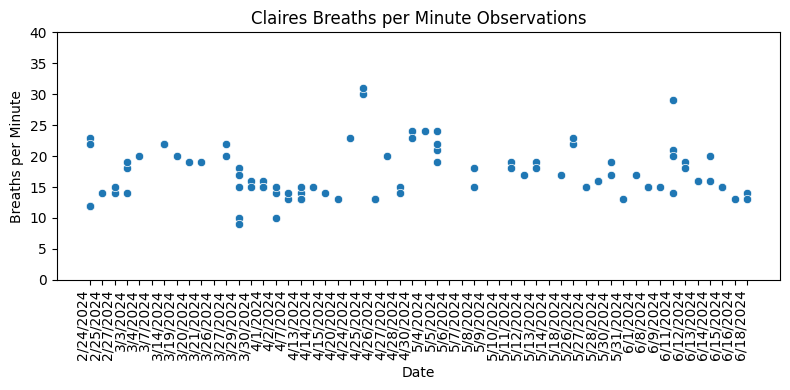

In [6]:
#Create an x date dataframe, y breaths per minute data frame. Combine both into the variable data. 
x = df['date']
y = df['breaths_per_minute']
data = pd.DataFrame({'Date': x, 'Breaths per Minute': y})

# Create scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Date', y='Breaths per Minute', data=data)

# Format x-axis labels
plt.xticks(rotation=90, ha='right')
# Set y-axis range
plt.ylim(0, 40)

# Add title and labels
plt.title('Claires Breaths per Minute Observations')
plt.xlabel('Date')
plt.ylabel('Breaths per Minute')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Data Points')

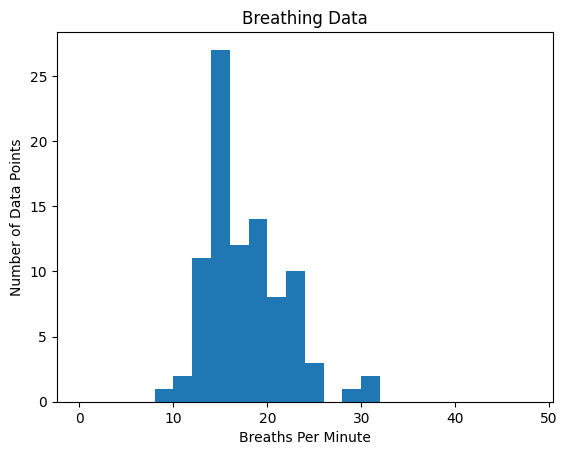

In [7]:
plt.hist(df['breaths_per_minute'], bins = range(0,50,2))
plt.title('Breathing Data')
plt.xlabel('Breaths Per Minute')
plt.ylabel('Number of Data Points')

In [8]:
est = ols(formula="breaths_per_minute ~ furosemide_dose", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     breaths_per_minute   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1562
Date:                Tue, 18 Jun 2024   Prob (F-statistic):              0.694
Time:                        22:34:33   Log-Likelihood:                -256.74
No. Observations:                  90   AIC:                             517.5
Df Residuals:                      88   BIC:                             522.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3237      2.345     